# Highlighting the differences between HUNT3 and HUNT4

### Install and import required packages

In [1]:
%pip install --quiet -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [1]:
import matplotlib.pyplot as plt
from utils.hunt_data_loader import HuntDataLoader
import numpy as np
import utils.analysis as analysis
import pandas as pd

data_loader = HuntDataLoader()

### See the Size, values and mean of the dataset entries

First we make sure that there is an equal amount of Hunt3 (60yo) and Hunt4 (70yo) brain scans. We only use 100 entries when estimating average intensity to save time.

In [4]:
info = data_loader.get_data_info(max_entries=100)

num_samples = info[0]
print(f"Number of samples: {num_samples}")

Number of entries in HUNT3: 703
Number of entries in HUNT4: 703
Average intensity across Hunt3: 0.10296124348427753
Average intensity across Hunt4: 0.10225309420742373
Min shape across Hunt3: [193, 229, 193], Max shape across Hunt3: [193, 229, 193]
Min shape across Hunt4: [193, 229, 193], Max shape across Hunt4: [193, 229, 193]
Number of samples: 703


### Load and see a random brain-scan pair

We select a random candidate from the closed dataset

In [3]:
hunt3, hunt4 = data_loader.get_random_pair(verbose=True)

h3 = data_loader.get_middle_slice(hunt3)
h4 = data_loader.get_middle_slice(hunt4)

Viewing candidate: 06215
06215 exists in both HUNT3 and HUNT4


We load both Brain Scan images (NIfTI files), get their fdata and display the center slice in the series

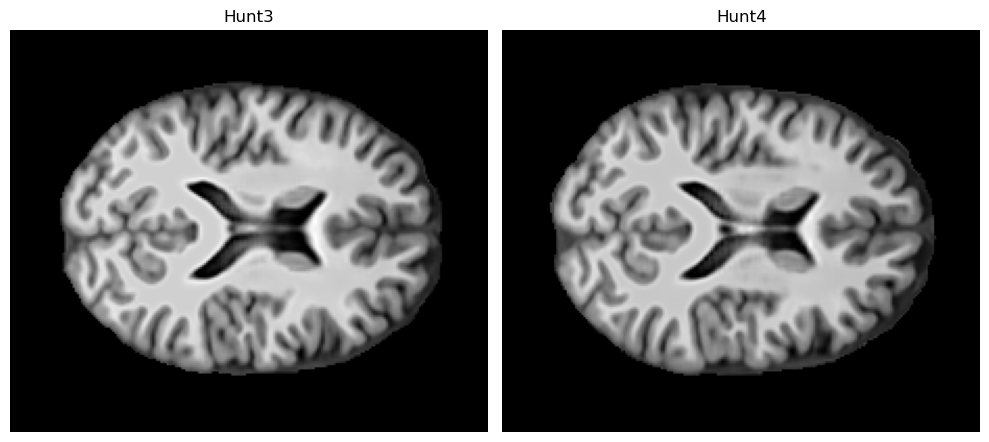

In [4]:
data_loader.display_slices(slices=[h3, h4], slice_labels=["Hunt3", "Hunt4"])

## Differences

We now calculate the structural similarity of the two slices. This will show us how similar they are from 0-1, with 0 being totally different and 1 being the same image. As most of the picture is black and the brain doesn't change that much, we should expect a high number

In [5]:
print("Structural Similarity:", data_loader.structural_similarity(h3, h4))

Structural Similarity: 0.896958752862705


### Highlighting the differences

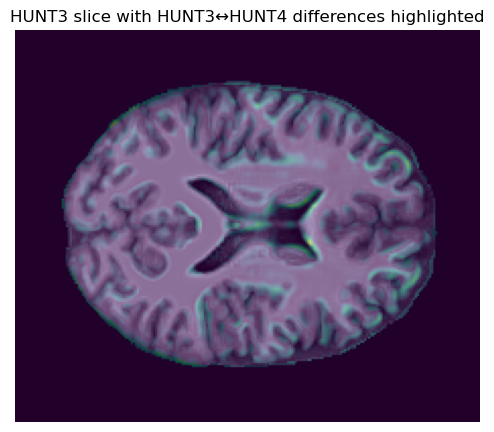

In [6]:
data_loader.display_slice_differences(h3, h4, hot=False)

### Displaying only the differences

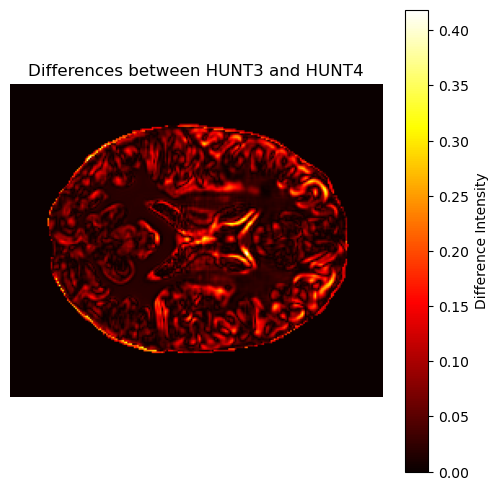

In [7]:
data_loader.display_slice_differences(h3, h4, hot=True)

## Analysis

### Brain Parenchyma Fraction (BPF)

In [8]:
hunt3_file = data_loader.load_from_path(hunt3)
hunt4_file = data_loader.load_from_path(hunt4)

print("hunt3:", hunt3)

hunt3_bpf = analysis.calculate_bpf_from_skullstripped_t1_gmm(hunt3_file, sample_max=500_000)
print("HUNT3: Brain Parenchymal Fraction (BPF):", hunt3_bpf)

hunt4_bpf = analysis.calculate_bpf_from_skullstripped_t1_gmm(hunt4_file, sample_max=500_000)
print("HUNT4: Brain Parenchymal Fraction (BPF):", hunt4_bpf)

#h3 = analysis.calculate_bpf_from_skullstripped_t1_gmm_with_qc(hunt3_file)
#h4 = analysis.calculate_bpf_from_skullstripped_t1_gmm_with_qc(hunt4_file)
#print(h3["bpf"], h3["fractions"], h3["ordered_means_dark_to_bright"])
#print(h4["bpf"], h4["fractions"], h4["ordered_means_dark_to_bright"])



hunt3: /cluster/projects/vc/data/mic/closed/MRI_HUNT/images/images_3D_preprocessed/HUNT3/06215/06215_0_T1_PREP_MNI.nii.gz
HUNT3: Brain Parenchymal Fraction (BPF): 0.7568239539401308
HUNT4: Brain Parenchymal Fraction (BPF): 0.7617953091460593


#### Create .csv with HUNT3 and HUNT4 BPF

In [ ]:
all_pairs = data_loader.get_all_pairs()

# Initialize an empty DataFrame with the desired columns (all_pairs contains 2-column tuples)
calculated_data = pd.DataFrame(columns=["id", "hunt3_bpf", "hunt4_bpf", "diff_bpf"])

for pair in all_pairs:
    h3_file = data_loader.load_from_path(pair[0])
    h4_file = data_loader.load_from_path(pair[1])
    h3_bpf = analysis.calculate_bpf_from_skullstripped_t1_gmm(h3_file, sample_max=500_000)
    h4_bpf = analysis.calculate_bpf_from_skullstripped_t1_gmm(h4_file, sample_max=500_000)
    diff_bpf = h3_bpf - h4_bpf

    # Get id from pair[0] (assuming it's the same for pair[1])
    id = pair[0].split("/")[-2]

    calculated_data = pd.concat([calculated_data, pd.DataFrame([[id, h3_bpf, h4_bpf, diff_bpf]], columns=["id", "hunt3_bpf", "hunt4_bpf", "diff_bpf"])], ignore_index=True)

    # Print progress
    if len(calculated_data) % 10 == 0:
        print(f"Processed {len(calculated_data)} / {len(all_pairs)}")

# Save to CSV
calculated_data.to_csv("out/bpf_results2.csv", index=False)

/tmp/ipykernel_1228467/269885485.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  calculated_data = pd.concat([calculated_data, pd.DataFrame([[id, h3_bpf, h4_bpf, diff_bpf]], columns=["id", "hunt3_bpf", "hunt4_bpf", "diff_bpf"])], ignore_index=True)


Processed 10 / 703
Processed 20 / 703
Processed 30 / 703
Processed 40 / 703
Processed 50 / 703
Processed 60 / 703
Processed 70 / 703
Processed 80 / 703
Processed 90 / 703
Processed 100 / 703
Processed 110 / 703
Processed 120 / 703
Processed 130 / 703
Processed 140 / 703
Processed 150 / 703
Processed 160 / 703
Processed 170 / 703
Processed 180 / 703
Processed 190 / 703
Processed 200 / 703
Processed 210 / 703
Processed 220 / 703
Processed 230 / 703
Processed 240 / 703
Processed 250 / 703
Processed 260 / 703
Processed 270 / 703
Processed 280 / 703
Processed 290 / 703
Processed 300 / 703
Processed 310 / 703
Processed 320 / 703
Processed 330 / 703
Processed 340 / 703
Processed 350 / 703
Processed 360 / 703
Processed 370 / 703
Processed 380 / 703
Processed 390 / 703
Processed 400 / 703
Processed 410 / 703
Processed 420 / 703
Processed 430 / 703
Processed 440 / 703
Processed 450 / 703
Processed 460 / 703
Processed 470 / 703
Processed 480 / 703
Processed 490 / 703
Processed 500 / 703
Processed

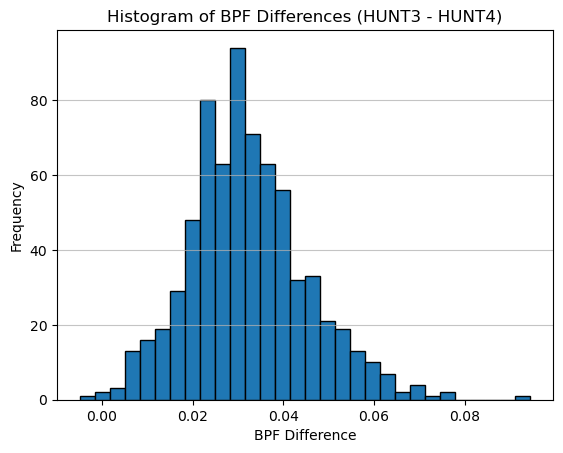

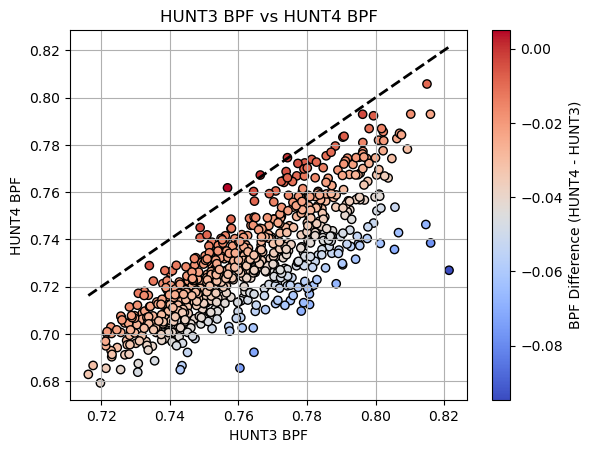

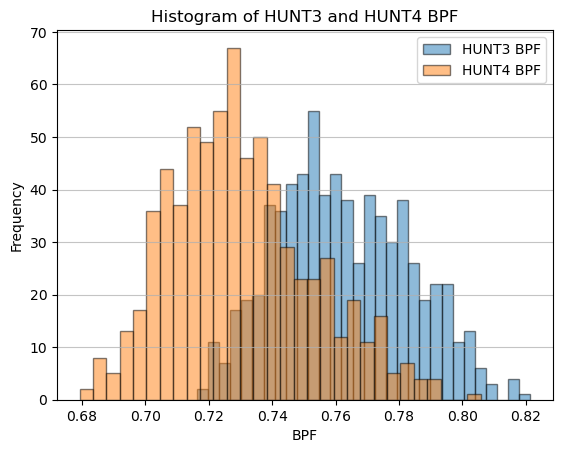

/tmp/ipykernel_1247145/1449121190.py:37: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([h3, h4], labels=['HUNT3 BPF', 'HUNT4 BPF'])


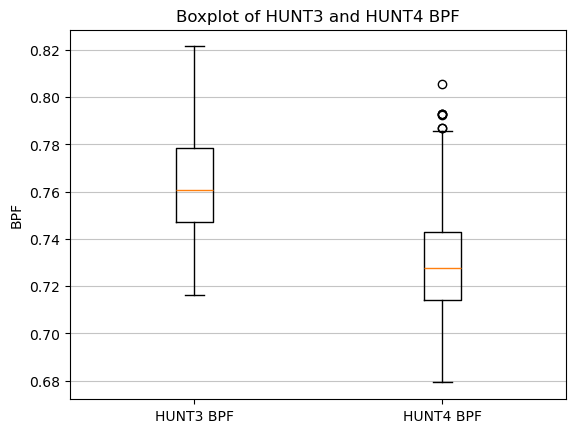

In [16]:
# Read from CSV
calculated_data = pd.read_csv("out/bpf_results.csv")

# Plot histogram of diff_bpf
plt.hist(calculated_data["diff_bpf"], bins=30, edgecolor='black')
plt.title("Histogram of BPF Differences (HUNT3 - HUNT4)")
plt.xlabel("BPF Difference")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)
plt.show()

# Plot scatter of hunt3_bpf vs hunt4_bpf
h3 = calculated_data["hunt3_bpf"].to_numpy()
h4 = calculated_data["hunt4_bpf"].to_numpy()
diff = h4 - h3

plt.scatter(h3, h4, c=diff, cmap='coolwarm', edgecolor='k')
plt.colorbar(label='BPF Difference (HUNT4 - HUNT3)')
plt.plot([min(h3), max(h3)], [min(h3), max(h3)], 'k--', lw=2)  # Diagonal line
plt.title("HUNT3 BPF vs HUNT4 BPF")
plt.xlabel("HUNT3 BPF")
plt.ylabel("HUNT4 BPF")
plt.grid(True)
plt.show()

# Plot histogram of hunt3_bpf and hunt4_bpf
plt.hist(h3, bins=30, alpha=0.5, label='HUNT3 BPF', edgecolor='black')
plt.hist(h4, bins=30, alpha=0.5, label='HUNT4 BPF', edgecolor='black')
plt.title("Histogram of HUNT3 and HUNT4 BPF")
plt.xlabel("BPF")
plt.ylabel("Frequency")
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

# Plot boxplot of hunt3_bpf and hunt4_bpf
plt.boxplot([h3, h4], labels=['HUNT3 BPF', 'HUNT4 BPF'])
plt.title("Boxplot of HUNT3 and HUNT4 BPF")
plt.ylabel("BPF")
plt.grid(axis='y', alpha=0.75)
plt.show()